### Notebook Skill Gap Module Career Path Navigator API


Projek akan diintegrasikan dengan modul lain untuk pemenuhan capstone project dicoding path data science. Capaian projek ialah membuat career path navigator.

# Import Library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

Load Dataset

In [25]:
df = pd.read_csv("../../data/final_data.csv", delimiter=",")
df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,...,company_industry,job_description,salary,job_description_cleaned,annotations,skills,career_level_norm,experience_years,experience_bucket,education_level_norm
0,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",...,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,responsibilitiesprepare corporate income tax c...,{'text': 'responsibilitiesprepare corporate in...,"['income tax', 'tax compliance', 'digital elec...",Supervisor,3,Middle,S1
1,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,...,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,scope of role to plan develop implement and me...,{'text': 'scope of role to plan develop implem...,"['marketing communication', 'strategic communi...",Manajer,2,Middle,Unknown
2,32,PPIC,Tangerang,IDR,Manajer/Asisten Manajer,5 tahun,Sarjana (S1),Penuh Waktu,"Manufaktur,Manufaktur","Asuransi kesehatan;Waktu regular, Senin - Juma...",...,Manufaktur/Produksi,Tanggung Jawab:Membuat perencanaan produksi be...,6600000.0,tanggung jawab membuat perencanaan produksi be...,{'text': 'tanggung jawab membuat perencanaan p...,"['warehouse management', 'inventory control', ...",Manajer,5,Senior,S1
3,35,C# Advanced/Senior Developer,Jakarta Timur,IDR,Supervisor/Koordinator,2 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",...,Komputer/Teknik Informatika (Perangkat Lunak),Kualifikasi:Kandidat harus memiliki setidaknya...,9500000.0,kualifikasi kandidat harus memiliki setidaknya...,{'text': 'kualifikasi kandidat harus memiliki ...,"['asp net', 'object orient programming', 'c', ...",Supervisor,2,Middle,S1
4,38,IT Software Developer Staff,Jakarta Barat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Kasual (contoh: Kaos);Senin - Jum'at (HO) Seni...,...,Industri Berat/Mesin/Peralatan,Bachelor’s degree of Information Technology or...,6800000.0,bachelor’s degree of information technology or...,{'text': 'bachelor’s degree of information tec...,"['information technology', 'restful api', 'spr...",Staff,1,Entry,S2


# Skill Gap Module Using RF & TF-IDF

Training Model

In [26]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1500, stop_words='english') 
X = tfidf.fit_transform(df['skills']) 
y = df['job_title']
# Mendapatkan nama fitur
feature_names = np.array(tfidf.get_feature_names_out())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Classifier
print("Sedang melatih Random Forest...")

# Deklarasi dan pelatihan model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1) 
rf.fit(X_train, y_train)

Sedang melatih Random Forest...


c:\Users\ACER\Documents\Dokumen\Data Science Dicoding\Project Capstone\Project\Career-Path-Navigator\navigator-env\Lib\site-packages\sklearn\ensemble\_forest.py:830: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
c:\Users\ACER\Documents\Dokumen\Data Science Dicoding\Project Capstone\Project\Career-Path-Navigator\navigator-env\Lib\site-packages\sklearn\tree\_classes.py:297: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
c:\Users\ACER\Documents\Dokumen\Data Science Dicoding\Project Capstone\Project\Career-Path-Navigator\navigator-env\Lib\site-packages\sklearn\tree\_classes.py:297: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Evaluasi Model

In [27]:
# 1. Lakukan Prediksi pada Test Set
print("⏳ Sedang memprediksi X_test...")
y_pred = rf.predict(X_test)

# 2. Hitung Metrics Global (Weighted Average)
# Weighted dipilih karena jumlah lowongan tiap job tidak seimbang
precision_global, recall_global, f1_global, _ = precision_recall_fscore_support(
    y_test, y_pred, average='weighted', zero_division=0
)

acc = accuracy_score(y_test, y_pred)

print(f"\n{'='*40}")
print(f"📊 EVALUASI MODEL GLOBAL")
print(f"{'='*40}")
print(f"Akurasi   : {acc:.4f}")
print(f"Precision : {precision_global:.4f}")
print(f"Recall    : {recall_global:.4f}")
print(f"F1-Score  : {f1_global:.4f}")
print(f"{'='*40}")

# 3. Laporan Detail untuk Job Tertentu Saja
# (Kita tidak print semua karena ada ratusan job, console bisa macet)

target_roles = ['Data Scientist', 'Data Analyst', 'Business Analyst'] # Ganti sesuai keinginan
print(f"\n🔍 PERFORMA SPESIFIK PADA ROLE POPULER:")

# Ambil report dalam bentuk dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

for role in target_roles:
    # Cari role yang namanya mengandung kata kunci (Case insensitive)
    # Karena di database mungkin namanya "Junior Data Scientist", bukan persis "Data Scientist"
    found = False
    for key in report_dict.keys():
        if role.lower() in key.lower() and key != 'accuracy':
            print(f"\nJob Title: '{key}'")
            print(f"   - Precision : {report_dict[key]['precision']:.2f}")
            print(f"   - Recall    : {report_dict[key]['recall']:.2f}")
            print(f"   - F1-Score  : {report_dict[key]['f1-score']:.2f}")
            print(f"   - Support   : {report_dict[key]['support']} data")
            found = True
            
    if not found:
        print(f"\n❌ Role '{role}' tidak ditemukan di Test Set (Mungkin datanya sedikit/masuk training set semua).")

⏳ Sedang memprediksi X_test...

📊 EVALUASI MODEL GLOBAL
Akurasi   : 0.2239
Precision : 0.2050
Recall    : 0.2239
F1-Score  : 0.2085

🔍 PERFORMA SPESIFIK PADA ROLE POPULER:

❌ Role 'Data Scientist' tidak ditemukan di Test Set (Mungkin datanya sedikit/masuk training set semua).

Job Title: 'Assistant Data Analyst Manager'
   - Precision : 0.00
   - Recall    : 0.00
   - F1-Score  : 0.00
   - Support   : 1.0 data

Job Title: 'DATA ANALYST'
   - Precision : 0.00
   - Recall    : 0.00
   - F1-Score  : 0.00
   - Support   : 1.0 data

Job Title: 'Data Analyst'
   - Precision : 0.00
   - Recall    : 0.00
   - F1-Score  : 0.00
   - Support   : 1.0 data

Job Title: 'Data Analyst Staff'
   - Precision : 0.00
   - Recall    : 0.00
   - F1-Score  : 0.00
   - Support   : 1.0 data

Job Title: 'Programmer & Data Analyst'
   - Precision : 0.00
   - Recall    : 0.00
   - F1-Score  : 0.00
   - Support   : 0.0 data

Job Title: 'Sales Data Analyst Supervisor'
   - Precision : 0.00
   - Recall    : 0.00
   

**Kenapa Akurasinya Cuma 22%?**

Untuk dataset lowongan kerja dengan ribuan variasi nama jabatan, akurasi 20-30% itu sudah wajar dan cukup bagus. Model bingung membedakan antara "Data Scientist" dan "Senior Data Scientist" karena skill-nya mirip (Python, SQL). Dan kebingungan ini justru bagus untuk kita

**Kenapa Kita Tetap Bisa Pakai Model "Lemah" Ini?**

Tujuan kita membuat Random Forest di sini BUKAN untuk Memprediksi (Classification), tapi untuk Mencari Tahu (Interpretation).

* Tujuan Prediksi: Input skill -> Output nama pekerjaan. (Kita tidak butuh ini).

* Tujuan Kita (Feature Importance): Kita ingin tahu: "Menurut Random Forest, skill apa sih yang paling sering membedakan satu pekerjaan dengan pekerjaan lain?"

Meskipun model sering salah tebak nama persis jabatannya (misal: menebak "Senior Data Analyst" padahal aslinya "Data Analyst"), model tetap belajar bahwa SQL dan Python adalah skill pembeda utama.

Jadi, Global Importance (rf.feature_importances_) yang dihasilkan tetap VALID meskipun akurasi prediksi rendah.

Hitung Importance Menggunakan Permutation Importance

Mengambil Feature Importance dari Random Forest...
Nilai Importance Tertinggi (Raw): 0.01066
Melakukan scaling agar rentang menjadi 0.0 s/d 1.0 ...


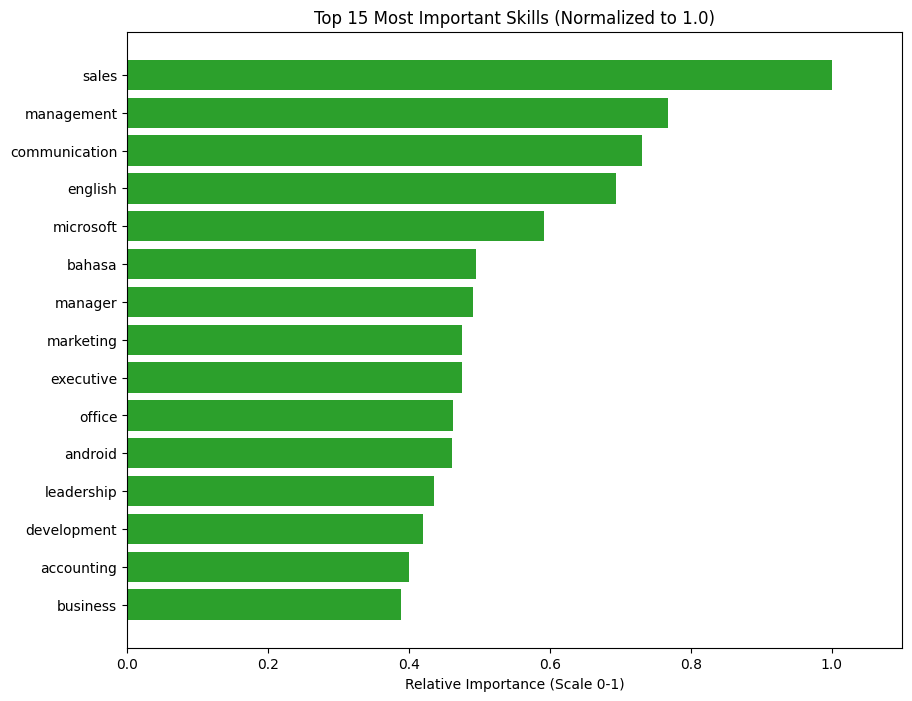


🔍 Cek Skor Skill Kunci (Setelah Normalisasi):
   - python         : 0.0626 
   - sql            : 0.1802 
   - excel          : 0.1383 
   - communication  : 0.7310 
   - analysis       : 0.1971 

✅ Global Importance Selesai & Ternormalisasi.


In [28]:
# ==============================================================================
# 3. GLOBAL IMPORTANCE (MDI + NORMALISASI)
# ==============================================================================
print("Mengambil Feature Importance dari Random Forest...")

# 1. Ambil Raw Importance
raw_importances = rf.feature_importances_

# 2. Lakukan Normalisasi (Teknik teman Anda)
# Skill paling penting akan bernilai 1.0
max_val = raw_importances.max()
normalized_importances = raw_importances / max_val

print(f"Nilai Importance Tertinggi (Raw): {max_val:.5f}")
print("Melakukan scaling agar rentang menjadi 0.0 s/d 1.0 ...")

# 3. Simpan ke Dictionary
global_importance_dict = dict(zip(feature_names, normalized_importances))

# Visualisasi Top 15 Skill (Data yang sudah dinormalisasi)
indices = np.argsort(normalized_importances)[-15:]

plt.figure(figsize=(10, 8))
plt.title('Top 15 Most Important Skills (Normalized to 1.0)')
plt.barh(range(len(indices)), normalized_importances[indices], color='#2ca02c', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance (Scale 0-1)')
plt.xlim(0, 1.1) # Biar mentok kanan terlihat jelas
plt.show()

# Cek Debug
print("\n🔍 Cek Skor Skill Kunci (Setelah Normalisasi):")
check_skills = ["python", "sql", "excel", "communication", "analysis"]
for skill in check_skills:
    score = global_importance_dict.get(skill, 0)
    print(f"   - {skill:<15}: {score:.4f} {'(Top Skill!)' if score == 1.0 else ''}")

print("\n✅ Global Importance Selesai & Ternormalisasi.")

Pembuatan Skill Gap Module RF dan TF-IDF

Harmonic Mean Logic

$$Score = \frac{2 \times (Relevance \times Importance)}{Relevance + Importance}$$

In [31]:
class SkillGapModule:
    def __init__(self, vectorizer, df_data, global_imp_dict):
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.global_imp = global_imp_dict
        self.df_data = df_data
        
    def get_target_vector(self, target_keyword):
        # Cari job mengandung keyword
        matched_jobs = self.df_data[self.df_data['job_title'].str.contains(target_keyword, case=False, na=False)]
        
        if matched_jobs.empty:
            return None, []
        
        found_titles = matched_jobs['job_title'].unique().tolist()
        
        # Buat profil gabungan (rata-rata vektor)
        all_skills_text = matched_jobs['skills']
        target_vec_matrix = self.vectorizer.transform(all_skills_text)
        composite_vector = np.asarray(target_vec_matrix.mean(axis=0)).flatten()
        
        return composite_vector, found_titles

    def analyze(self, user_skills_text, target_keyword, top_n=5):
        # 1. Dapatkan Vektor Target
        target_vec, found_titles = self.get_target_vector(target_keyword)
        
        if target_vec is None:
            print(f"❌ Tidak ditemukan pekerjaan dengan kata kunci: '{target_keyword}'")
            return []
        
        display_titles = found_titles[:3] + ["...dll"] if len(found_titles) > 3 else found_titles
        print(f"🔍 Menggunakan profil gabungan dari {len(found_titles)} job titles: {display_titles}")
        
        # 2. Hitung Gap Vector (Target - User)
        user_vec = self.vectorizer.transform([user_skills_text]).toarray().flatten()
        gap_vec = np.maximum(0, target_vec - user_vec)
        
        # Ambil indeks gap positif
        gap_indices = np.where(gap_vec > 0.005)[0]
        
        if len(gap_indices) == 0:
            return []

        # 3. Scoring Candidate
        candidates = []
        for idx in gap_indices:
            skill_name = self.feature_names[idx]
            
            # RELEVANCE (TF-IDF Gap): Seberapa besar gap-nya di job ini?
            relevance = gap_vec[idx]
            
            # IMPORTANCE (Global Normalized): Seberapa 'dewa' skill ini secara umum?
            # (Nilai sudah 0.0 - 1.0 dari tahap sebelumnya)
            importance = self.global_imp.get(skill_name, 0)
            
            candidates.append({
                'skill': skill_name,
                'relevance': relevance,
                'importance': importance
            })
            
        if not candidates:
            return []
            
        # 4. Final Processing
        df_cand = pd.DataFrame(candidates)
        
        # Kita tetap butuh MinMaxScaler internal agar 'Relevance' (TF-IDF) 
        # bisa bersanding adil dengan 'Importance'
        scaler = MinMaxScaler()
        
        if len(df_cand) > 1:
            scaled = scaler.fit_transform(df_cand[['relevance', 'importance']])
            df_cand['rel_norm'] = scaled[:, 0]
            df_cand['imp_norm'] = scaled[:, 1]
        else:
            df_cand['rel_norm'] = 1.0
            df_cand['imp_norm'] = 1.0 # Fallback jika cuma 1 kandidat
            
        # Rumus Harmonic Mean
        epsilon = 1e-5
        df_cand['final_score'] = 2 * (df_cand['rel_norm'] * df_cand['imp_norm']) / \
                                     (df_cand['rel_norm'] + df_cand['imp_norm'] + epsilon)
        
        return df_cand.sort_values('final_score', ascending=False).head(top_n)[['skill', 'final_score']].to_dict('records')

# Inisialisasi Ulang
gap_analyzer = SkillGapModule(tfidf, df, global_importance_dict)
print("✅ Modul Smart Search + Normalized Importance Siap!")

✅ Modul Smart Search + Normalized Importance Siap!


# Simulasi Skill Gap Module Using RF & TF-IDF

Fungsi Simulasi Visual

In [32]:
def simulate_gap(user_name, current_skills, target_role):
    print(f"\n{'='*60}")
    print(f"👤 USER: {user_name}")
    print(f"🎯 TARGET: {target_role}")
    print(f"{'='*60}")

    results = gap_analyzer.analyze(current_skills, target_role, top_n=10)

    if results:
        df_res = pd.DataFrame(results)
        
        # Tampilkan Grafik
        plt.figure(figsize=(10, 5))
        sns.barplot(data=df_res, x='final_score', y='skill', hue='final_score', palette='viridis', legend=False)
        plt.title(f'Rekomendasi Skill: {target_role}')
        plt.xlabel('Harmonic Score (Relevance + Importance)')
        plt.show()
        
        print("📋 Top 5 Rekomendasi:")
        print(df_res[['skill', 'final_score']].head(5))
    else:
        print("✅ Tidak ada gap skill yang signifikan! Anda sudah siap.")

print("✅ Fungsi Simulasi Siap.")

✅ Fungsi Simulasi Siap.


Jalankan Skenario Pengujian

Skenario 1 : Admin ingin jadi Data Scientist


👤 USER: Budi
🎯 TARGET: Scientist
🔍 Menggunakan profil gabungan dari 2 job titles: ['DATA SCIENTIST', 'Junior Data Scientist']


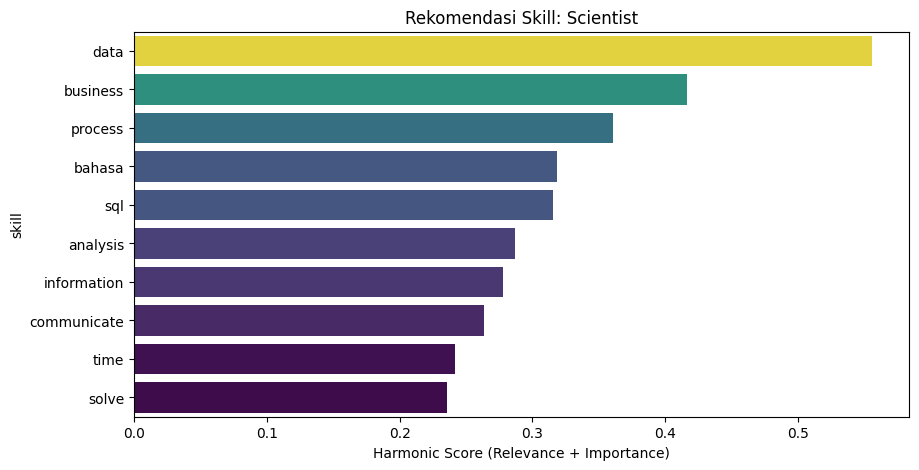

📋 Top 5 Rekomendasi:
      skill  final_score
0      data     0.555929
1  business     0.416444
2   process     0.360466
3    bahasa     0.318927
4       sql     0.315319


In [33]:
simulate_gap("Budi", "excel word", "Scientist") 
# (Akan mencari semua job yg ada kata 'Scientist')